In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Investigating Sales By Month

In [572]:
#Loading sales grouped by date
revbydatedf = pd.read_excel("Bicycle Shop Data.xlsx", sheet_name="Revenue By Date")
revbydatedf.head()

,Sales Date,Sales,Revenue
0,2022-01-01,1,1003.91
1,2022-01-02,10,8298.00
2,2022-01-03,8,175.84
3,2022-01-04,4,248.36
4,2022-01-05,4,3131.96


In [573]:
#creating 'month' column
revbydatedf["Month"] = revbydatedf["Sales Date"].dt.to_period("M").astype(str)
revbydatedf.head()

,Sales Date,Sales,Revenue,Month
0,2022-01-01,1,1003.91,2022-01
1,2022-01-02,10,8298.00,2022-01
2,2022-01-03,8,175.84,2022-01
3,2022-01-04,4,248.36,2022-01
4,2022-01-05,4,3131.96,2022-01


In [611]:
#finding total sales and revenue each month
revbymonth = revbydatedf[['Month','Sales','Revenue']].groupby('Month').sum()
(revbymonth['Revenue'].max()-revbymonth['Revenue'].min())/revbymonth['Revenue'].min()

2.1193204847434797

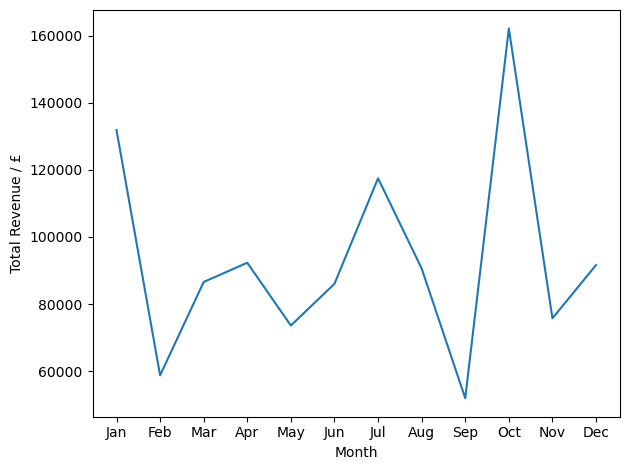

In [603]:
#displaying revenue by month as line graph
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(months,revbymonth['Revenue'],color="#1f77b4")
plt.xlabel('Month')
plt.ylabel('Total Revenue / £')
plt.tight_layout()
plt.savefig('Total Revenue by Month')

### Investigating Sales By Employee

In [576]:
#loading sales data grouped by employee
revbyemp = pd.read_excel("Bicycle Shop Data.xlsx", sheet_name="Revenue By Employee")
revbyemp = revbyemp.sort_values('Revenue') #ordering by revenue
revbyemp.head()

,Employee,Sales,Revenue
19,Dean Straight,56,18579.12
22,Akiko Yokomoto,36,22271.73
5,Ann Dull,49,26588.60
21,Johnson White,60,32411.55
17,Anne Ringer,70,32657.82


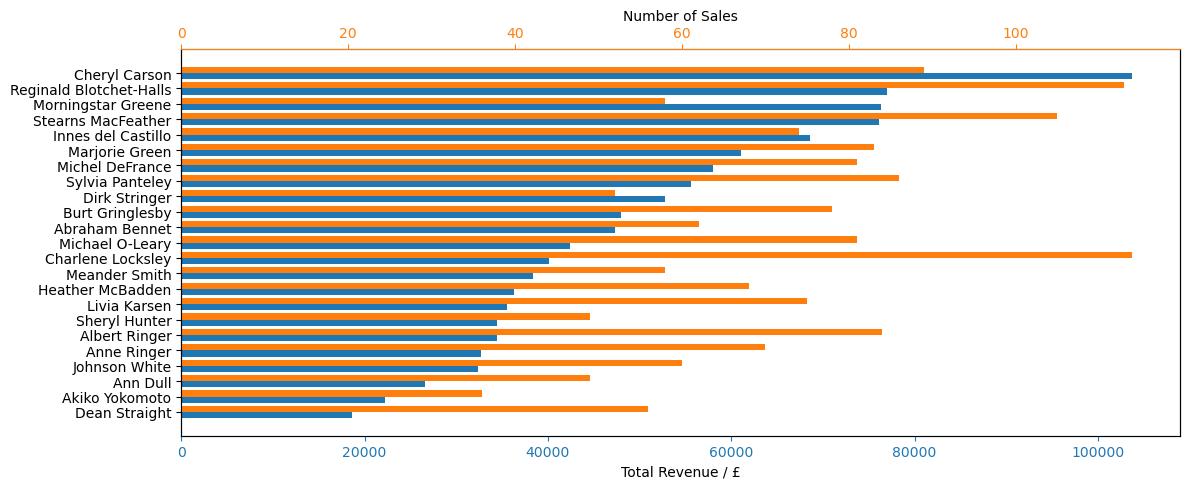

In [577]:
#creating a visual that displays both the sales and revenue by each employee

x = revbyemp['Revenue']
x2 = revbyemp['Sales']
width = 0.4 #separation for the two columns   
labels = revbyemp['Employee']
pos = np.arange(len(labels)) #positions of each employer on the y axis
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.barh(pos-width/2,x,width,color='#1f77b4') 
ax1.set_xlabel("Total Revenue / £")
ax1.set_yticks(pos)
ax1.set_yticklabels(labels)

ax2 = ax1.twiny()
ax2.barh(pos+width/2,x2,width,color="#ff7f0e")
ax2.set_xlabel("Number of Sales")

#setting the color of both the axes to correspond to the relevant bars
ax1.spines["bottom"].set_color('#1f77b4')
ax1.tick_params(axis='x', colors='#1f77b4')
ax2.spines["top"].set_color("#ff7f0e")
ax2.tick_params(axis='x', colors='#ff7f0e')

plt.tight_layout()
plt.savefig('Employees Sales and Revenue')

In [601]:
print(x.mean())
print((revbyemp[revbyemp['Employee']=='Cheryl Carson']['Revenue']-x.mean())/x.mean())

48643.69536231883
2    1.133399
Name: Revenue, dtype: float64


In [578]:
# average sale price by each employee
revbyemp['Average Sale'] = revbyemp['Revenue']/revbyemp['Sales']
revbyemp.sort_values('Average Sale',ascending=False).head()

,Employee,Sales,Revenue,Average Sale
7,Morningstar Greene,58,76369.81,1316.720862
2,Cheryl Carson,89,103776.42,1166.027191
20,Dirk Stringer,52,52745.43,1014.335192
4,Innes del Castillo,74,68603.35,927.072297
0,Abraham Bennet,62,47275.19,762.503065


### Factoring Monthly Sales into Employee Analysis

In [615]:
# loading sales grouped by both month and employee
df = pd.read_excel("Bicycle Shop Data.xlsx", sheet_name="Revenue By Month and Employee")
df.head()

,Month,Employee,Sales,Revenue
0,2022-01,Abraham Bennet,10,1932.000000
1,2022-01,Reginald Blotchet-Halls,9,7588.800000
2,2022-01,Cheryl Carson,16,44279.840000
3,2022-01,Innes del Castillo,10,11254.400000
4,2022-01,Marjorie Green,16,6861.716667


In [115]:
#Finding the fractional contribution of each employee each month
mapping = revbymonth["Revenue"].to_dict() #creating dictionary that has total revenue for each month
Monthlyrev = df['Month'].map(mapping) #mapping each row from the df to the corresponding months revenue
df['Fractional Contribution'] = df['Revenue']/Monthlyrev
df = df.sort_values(["Month", "Fractional Contribution"], ascending=[True, False])
df.head()

,Month,Employee,Sales,Revenue,Fractional Contribution
2,2022-01,Cheryl Carson,16,44279.84,0.335847
14,2022-01,Dirk Stringer,7,16064.93,0.121847
3,2022-01,Innes del Castillo,10,11254.40,0.085361
8,2022-01,Stearns MacFeather,13,9441.89,0.071613
5,2022-01,Morningstar Greene,11,8518.39,0.064609


In [173]:
#finding the mean of each employees monthly fractional contribution
meancont = df.groupby('Employee')['Fractional Contribution'].mean().sort_values()
labels = meancont.index.tolist()
meancont

Employee
Dean Straight              0.028919
Akiko Yokomoto             0.031604
Ann Dull                   0.033845
Charlene Locksley          0.040988
Meander Smith              0.044021
Livia Karsen               0.047187
Burt Gringlesby            0.059050
Johnson White              0.060080
Michael O-Leary            0.061158
Anne Ringer                0.061542
Dirk Stringer              0.062617
Marjorie Green             0.064267
Sylvia Panteley            0.066722
Albert Ringer              0.068901
Abraham Bennet             0.071860
Heather McBadden           0.073751
Michel DeFrance            0.080954
Innes del Castillo         0.083043
Stearns MacFeather         0.084629
Sheryl Hunter              0.095359
Reginald Blotchet-Halls    0.099839
Cheryl Carson              0.107167
Morningstar Greene         0.120589
Name: Fractional Contribution, dtype: float64

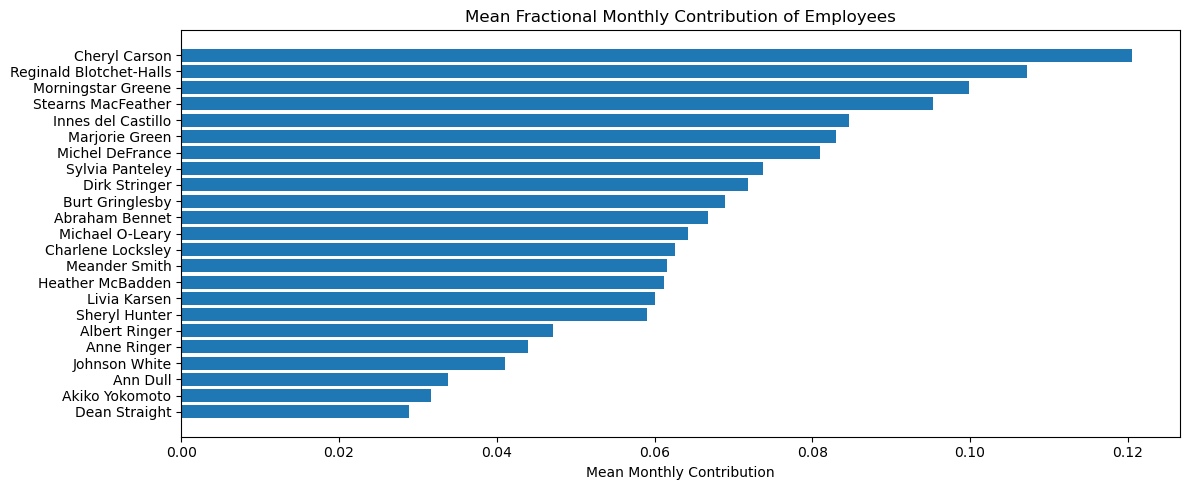

In [617]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.barh(labels,meancont,color='#1f77b4') 
ax1.set_xlabel("Mean Monthly Contribution")
plt.title('Mean Fractional Monthly Contribution of Employees')
plt.tight_layout()
plt.savefig('Mean Fractional Monthly Contribution of Employees')

In [619]:
#came up with a better idea to display all this information

mapping = meancont.to_dict() #creating dictionary that stores the mean frac_cont for each employee
revbyemp['Mean Fractional Contribution'] = revbyemp['Employee'].map(mapping) #mapping each row from the df to the corresponding months revenue
revbyemp.head()

,Employee,Sales,Revenue,Average Sale,Mean Fractional Contribution
19,Dean Straight,56,18579.12,331.770000,0.028919
22,Akiko Yokomoto,36,22271.73,618.659167,0.031604
5,Ann Dull,49,26588.60,542.624490,0.033845
21,Johnson White,60,32411.55,540.192500,0.060080
17,Anne Ringer,70,32657.82,466.540286,0.061542


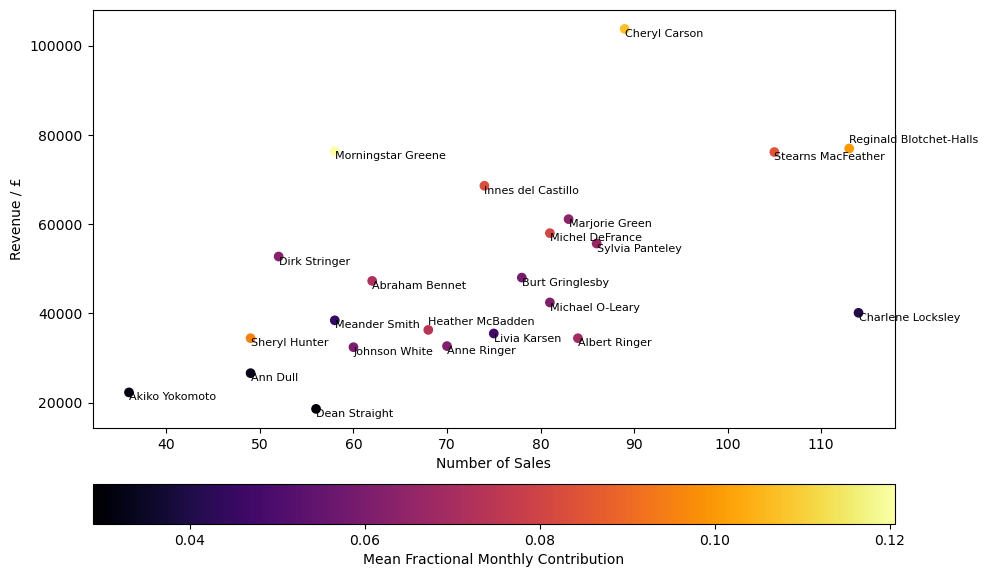

In [620]:
y = revbyemp['Revenue']
x = revbyemp['Sales']
labels = revbyemp['Employee']
c = revbyemp['Mean Fractional Contribution']

plt.figure(figsize=(10,6))
scatter = plt.scatter(x,y,c=c , cmap='inferno')
#creating colorbar that represents the mean fractional contribution
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.1,label='Mean Fractional Monthly Contribution') 
# adding small labels
for xi, yi, label in zip(x, y, labels):
    if label == 'Reginald Blotchet-Halls' or label == 'Heather McBadden':
        plt.text(xi, yi+3000, label, fontsize=8, ha='left', va='top')
    else:
        plt.text(xi, yi, label, fontsize=8, ha='left', va='top')
plt.ylabel('Revenue / £')
plt.xlabel('Number of Sales')
plt.tight_layout()

plt.savefig('Employee Revenue vs Sales')

### Product Analysis

In [625]:
#loading the dataset of products with their total revenue and units sold
productdf = pd.read_excel("Bicycle Shop Data.xlsx", sheet_name="Products By Revenue")
#productdf = productdf.sort_values('Units_Sold',ascending=False)
productdf = productdf[productdf["Price"] != 0] #removing products where price = 0 
productdf.tail()

,Name,Price,Units_Sold,Total_Revenue,Price Changed
215,Womens Mountain Shorts L,69.99,1,69.99,NaN
216,LL Touring Seat/Saddle,27.12,2,54.24,NaN
217,Mountain Tire Tube,4.99,3,14.97,NaN
218,Bearing Ball,0.80,5,4.00,NaN
219,Patch Kit/8 Patches,2.29,1,2.29,NaN


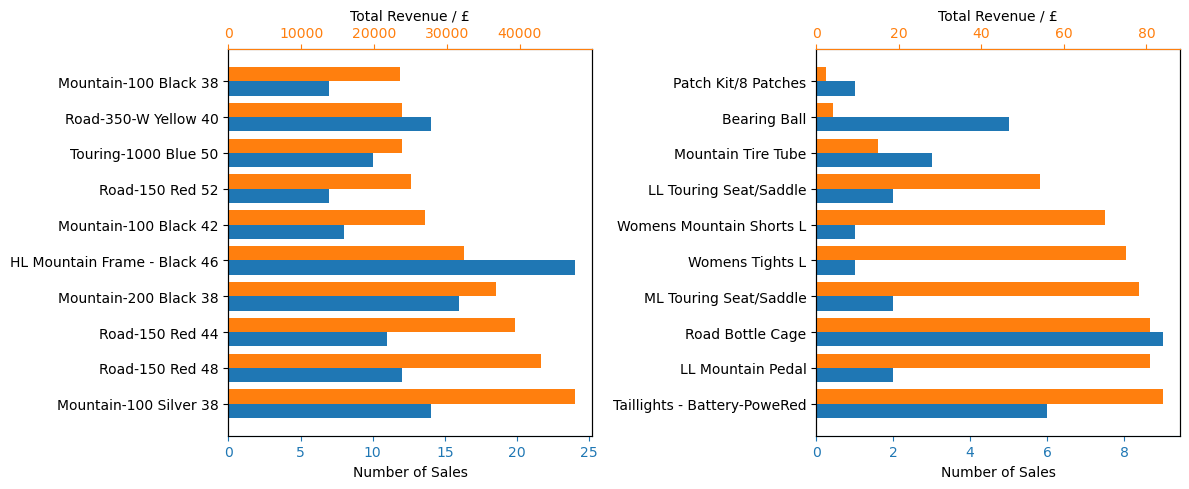

In [627]:
#creating a bar chart showing the top 10 highest and lowest revenues for products
x = productdf['Units_Sold'][:10]
x2 = productdf['Total_Revenue'][:10]
labels = productdf['Name'][:10]

width = 0.4    
pos = np.arange(len(labels)) 
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12, 5)) #creating a figure with two subplots, each subplot will have dual axes

ax1.barh(pos-width/2,x,width,color='#1f77b4') 
ax1.set_xlabel("Number of Sales")
ax1.set_yticks(pos)
ax1.set_yticklabels(labels)

ax2 = ax1.twiny()
ax2.barh(pos+width/2,x2,width,color="#ff7f0e")
ax2.set_xlabel("Total Revenue / £")

#setting the color of both the axes to correspond to the relevant bars
ax1.spines["bottom"].set_color('#1f77b4')
ax1.tick_params(axis='x', colors='#1f77b4')
ax2.spines["top"].set_color("#ff7f0e")
ax2.tick_params(axis='x', colors='#ff7f0e')

x3 = productdf['Units_Sold'][-10:] 
x4 = productdf['Total_Revenue'][-10:]
labels2 = productdf['Name'][-10:]

width2 = 0.4  
pos2 = np.arange(len(labels2)) 

ax3.barh(pos2-width2/2,x3,width2,color='#1f77b4') 
ax3.set_xlabel("Number of Sales")
ax3.set_yticks(pos2)
ax3.set_yticklabels(labels2)

ax4 = ax3.twiny()
ax4.barh(pos2+width2/2,x4,width2,color="#ff7f0e")
ax4.set_xlabel("Total Revenue / £")

#setting the color of both the axes to correspond to the relevant bars
ax3.spines["bottom"].set_color('#1f77b4')
ax3.tick_params(axis='x', colors='#1f77b4')
ax4.spines["top"].set_color("#ff7f0e")
ax4.tick_params(axis='x', colors='#ff7f0e')

plt.tight_layout()
plt.savefig('Top 10 Products by Higheset and Lowest Revenues')

In [628]:
#creating a category column,labelling bike and fram categories
productdf['Category']= None
productdf.loc[productdf['Name'].str.startswith('Mountain-'), 'Category'] = 'Mountain Bike'
productdf.loc[productdf['Name'].str.startswith('Road-'), 'Category'] = 'Road Bike'
productdf.loc[productdf['Name'].str.startswith('Touring-'), 'Category'] = 'Touring Bike'
productdf.loc[productdf['Name'].str.contains('Mountain Frame'), 'Category'] = 'Mountain Frame'
productdf.loc[productdf['Name'].str.contains('Road Frame'), 'Category'] = 'Road Frame'
productdf.loc[productdf['Name'].str.contains('Touring Frame'), 'Category'] = 'Touring Frame'

productdf.head()

,Name,Price,Units_Sold,Total_Revenue,Price Changed,Category
0,Mountain-100 Silver 38,3399.99,14,47599.86,NaN,Mountain Bike
1,Road-150 Red 48,3578.27,12,42939.24,NaN,Road Bike
2,Road-150 Red 44,3578.27,11,39360.97,NaN,Road Bike
3,Mountain-200 Black 38,2294.99,16,36719.84,NaN,Mountain Bike
4,HL Mountain Frame - Black 46,1349.60,24,32390.40,NaN,Mountain Frame


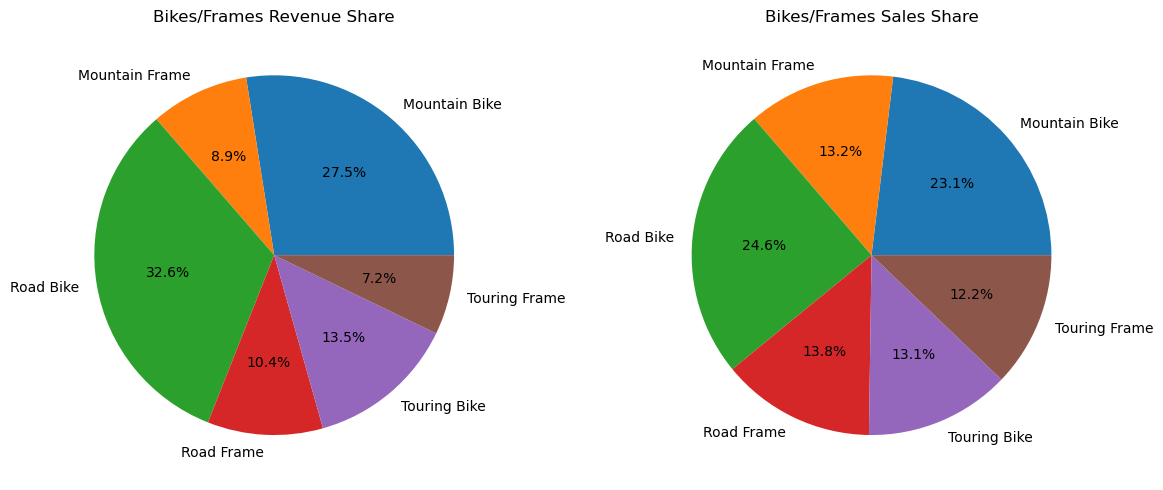

In [632]:
prodrev = productdf.groupby('Category')[['Total_Revenue','Units_Sold']].sum()
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12, 5))
ax1.pie(prodrev['Total_Revenue'],labels=prodrev.index.tolist(),autopct='%1.1f%%')
ax2.pie(prodrev['Units_Sold'],labels=prodrev.index.tolist(),autopct='%1.1f%%')
ax1.set_title('Bikes/Frames Revenue Share')
ax2.set_title('Bikes/Frames Sales Share')
plt.tight_layout()
fig2.savefig('Bikes and Frames Sales')

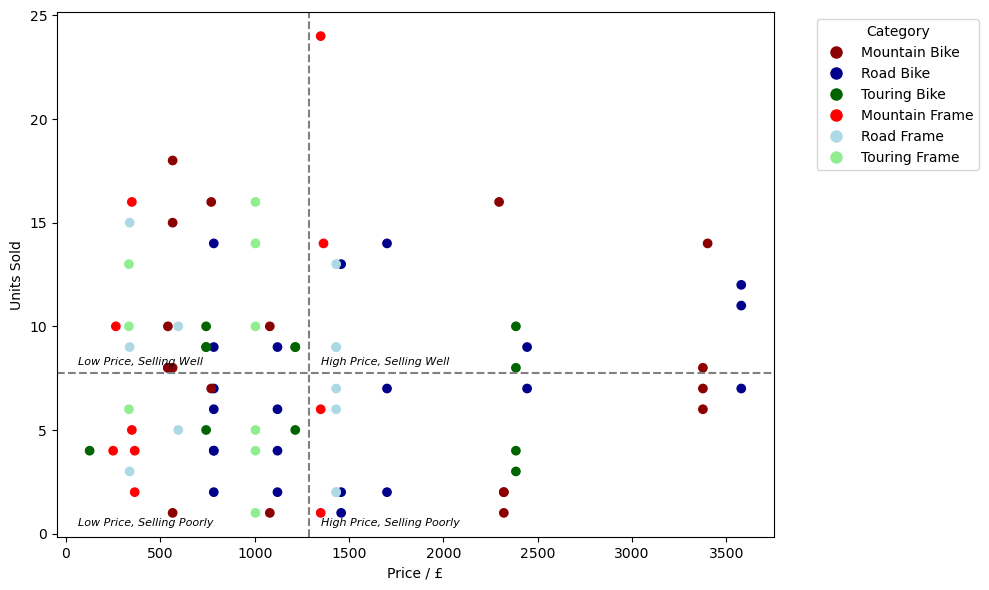

In [633]:
#I created a scatter to see if there was any correlation between price and sales, and created four quadrants to distinguish four groups of products
bikesdf = productdf[productdf['Category'].notna()]
x = bikesdf['Price']
y = bikesdf['Units_Sold']
labels = bikesdf['Name']
color_map = {
    'Mountain Bike': 'darkred',
    'Road Bike': 'darkblue',
    'Touring Bike': 'darkgreen',
    'Mountain Frame': 'red',
    'Road Frame': 'lightblue',
    'Touring Frame': 'lightgreen'
}
colors = bikesdf['Category'].map(color_map)

plt.figure(figsize=(10,6))
scatter = plt.scatter(x,y,c=colors)

# Adding Legend
handles = []
for category, color in color_map.items():
    handles.append(
        plt.Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=category,
            markerfacecolor=color,
            markersize=10))

x_mid = x.mean()
y_mid = y.mean()
plt.axvline(x=x_mid, linestyle='--',color='grey')
plt.axhline(y=y_mid, linestyle='--',color='grey')

plt.text(x_mid*1.05, y_mid*1.05, "High Price, Selling Well",fontsize=8,style='italic')
plt.text(x_mid*0.05, y_mid*1.05, "Low Price, Selling Well",fontsize=8,style='italic')
plt.text(x_mid*0.05, y_mid*0.05, "Low Price, Selling Poorly",fontsize=8,style='italic')
plt.text(x_mid*1.05, y_mid*0.05, "High Price, Selling Poorly",fontsize=8,style='italic')

plt.legend(title="Category", handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
    
plt.ylabel('Units Sold')
plt.xlabel('Price / £')
plt.tight_layout()
plt.savefig('Bike Products Scatter')

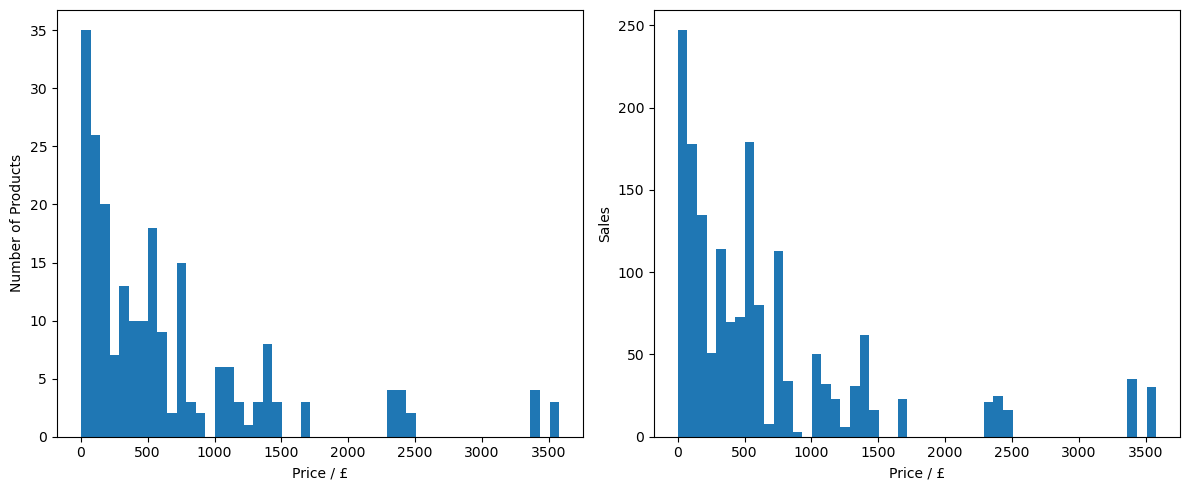

In [644]:
#creating two histograms to compare price distribution of products and how many sales in each price range
x = productdf['Price']
sales = productdf['Units_Sold']
fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(12, 5))
ax1.hist(x,bins=50)
ax1.set_xlabel('Price / £')
ax1.set_ylabel('Number of Products')
ax2.hist(x,bins=50,weights=sales)
ax2.set_xlabel('Price / £')
ax2.set_ylabel('Sales')
plt.tight_layout()
plt.savefig('Product Histograms')

In [662]:
#creating additional categories to compare revenues
productdf['Category']= None
productdf.loc[productdf['Name'].str.contains('Ball Bearing'), 'Category'] = 'Ball Bearing'
productdf.loc[productdf['Name'].str.contains('Crankarm'), 'Category'] = 'Crankarm'
productdf.loc[productdf['Name'].str.contains('Mountain'), 'Category'] = 'Mountain Bike Part'
productdf.loc[productdf['Name'].str.contains('Road'), 'Category'] = 'Road Bike Part'
productdf.loc[productdf['Name'].str.contains('Touring'), 'Category'] = 'Touring Bike Part'
productdf.loc[productdf['Name'].str.contains('Washer'), 'Category'] = 'Washer'
productdf.loc[productdf['Name'].str.contains('Nut'), 'Category'] = 'Nuts'
productdf.loc[productdf['Name'].str.contains('Metal Sheet'), 'Category'] = 'Metal Sheet'
productdf.loc[productdf['Name'].str.contains('Paint'), 'Category'] = 'Paint'
productdf.loc[productdf['Name'].str.contains('Jersey|Shorts|Tights|Gloves|Vest|Socks|Cap|Helmet'), 'Category'] = 'Clothing'


productdf.loc[productdf['Name'].str.startswith('Mountain-'), 'Category'] = 'Mountain Bike'
productdf.loc[productdf['Name'].str.startswith('Road-'), 'Category'] = 'Road Bike'
productdf.loc[productdf['Name'].str.startswith('Touring-'), 'Category'] = 'Touring Bike'
productdf.loc[productdf['Name'].str.contains('Mountain Frame'), 'Category'] = 'Mountain Frame'
productdf.loc[productdf['Name'].str.contains('Road Frame'), 'Category'] = 'Road Frame'
productdf.loc[productdf['Name'].str.contains('Touring Frame'), 'Category'] = 'Touring Frame'
productdf

,Name,Price,Units_Sold,Total_Revenue,Price Changed,Category
0,Mountain-100 Silver 38,3399.99,14,47599.86,NaN,Mountain Bike
1,Road-150 Red 48,3578.27,12,42939.24,NaN,Road Bike
2,Road-150 Red 44,3578.27,11,39360.97,NaN,Road Bike
3,Mountain-200 Black 38,2294.99,16,36719.84,NaN,Mountain Bike
4,HL Mountain Frame - Black 46,1349.60,24,32390.40,NaN,Mountain Frame
...,...,...,...,...,...,...
215,Womens Mountain Shorts L,69.99,1,69.99,NaN,Clothing
216,LL Touring Seat/Saddle,27.12,2,54.24,NaN,Touring Bike Part
217,Mountain Tire Tube,4.99,3,14.97,NaN,Mountain Bike Part
218,Bearing Ball,0.80,5,4.00,NaN,None


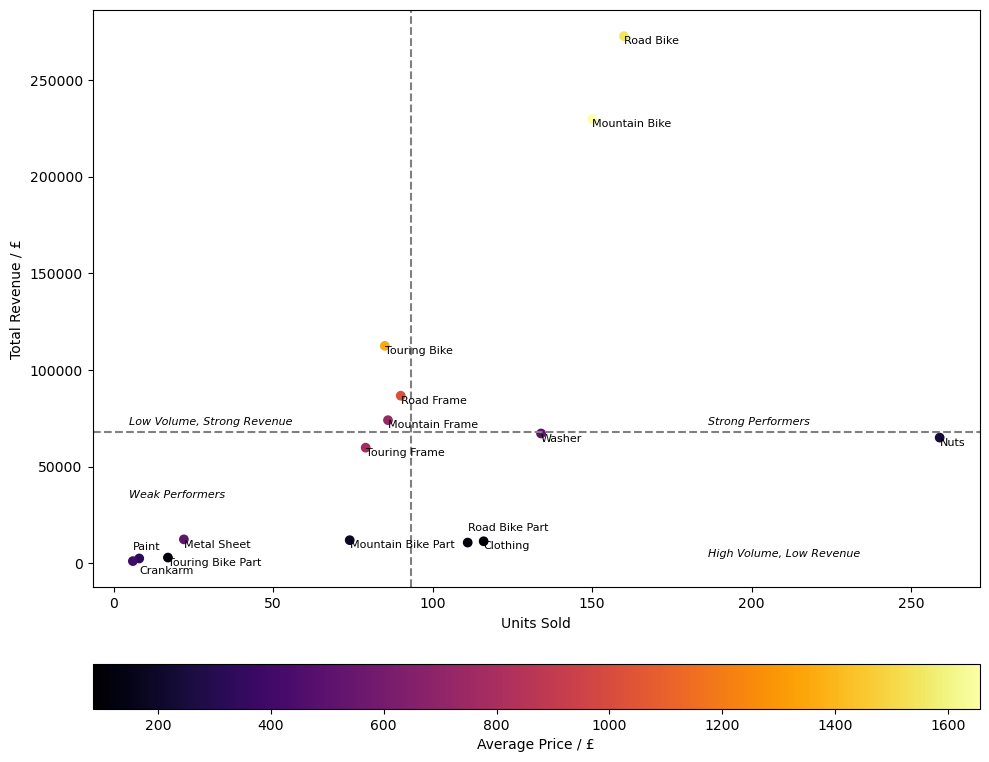

In [663]:
prodrev = productdf.groupby('Category')[['Total_Revenue','Units_Sold']].sum()
x = prodrev['Units_Sold']
y = prodrev['Total_Revenue']
labels = prodrev.index.tolist()
avprice = productdf.groupby('Category')['Price'].mean()


plt.figure(figsize=(10,8))
scatter = plt.scatter(x,y,c=avprice,cmap='inferno')
scatter2 = plt.scatter
#creating colorbar that represents the mean price
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.1,label='Average Price / £') 
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue / £')

for xi, yi, label in zip(x, y, labels):
    if label == 'Road Bike Part' or label == 'Paint':
        plt.text(xi, yi+10000, label, fontsize=8, ha='left', va='top')
    elif label == 'Crankarm':
        plt.text(xi, yi-4000, label, fontsize=8, ha='left', va='top')
    else:
        plt.text(xi, yi, label, fontsize=8, ha='left', va='top')

x_mid = x.mean()
y_mid = y.mean()
plt.axvline(x=x_mid, linestyle='--',color='grey')
plt.axhline(y=y_mid, linestyle='--',color='grey')

plt.text(x_mid*2, y_mid*1.05, "Strong Performers",fontsize=8,style='italic')
plt.text(x_mid*0.05, y_mid*1.05, "Low Volume, Strong Revenue",fontsize=8,style='italic')
plt.text(x_mid*0.05, y_mid*0.5, "Weak Performers",fontsize=8,style='italic')
plt.text(x_mid*2, y_mid*0.05, "High Volume, Low Revenue",fontsize=8,style='italic')
plt.tight_layout()
plt.savefig('All Products Scatter')

### Analysing Products with Time

In [392]:
#loading the dataset of products sold on each day
salesdf = pd.read_excel("Bicycle Shop Data.xlsx", sheet_name="Sales By Date")
salesdf.head()

,Sales Date,Product,Price,Quantity,Total Cost
0,2022-01-01,HL Touring Frame - Blue 54,1003.91,1,1003.91
1,2022-01-02,Lock Ring,829.80,10,8298.00
2,2022-01-03,Fender Set - Mountain,21.98,8,175.84
3,2022-01-04,ML Road Pedal,62.09,4,248.36
4,2022-01-05,Road-650 Red 62,782.99,4,3131.96


In [406]:
salesdf["Month"] = salesdf["Sales Date"].dt.to_period("M").astype(str)
salesdf.head()

,Sales Date,Product,Price,Quantity,Total Cost,Category,Month
0,2022-01-01,HL Touring Frame - Blue 54,1003.91,1,1003.91,Touring Bike,2022-01
1,2022-01-02,Lock Ring,829.80,10,8298.00,None,2022-01
2,2022-01-03,Fender Set - Mountain,21.98,8,175.84,None,2022-01
3,2022-01-04,ML Road Pedal,62.09,4,248.36,Road Bike,2022-01
4,2022-01-05,Road-650 Red 62,782.99,4,3131.96,Road Bike,2022-01


In [407]:
salesdf['Category'] = None
salesdf.loc[salesdf['Product'].str.contains('Mountain'), 'Category'] = 'Mountain Bike'
salesdf.loc[salesdf['Product'].str.contains('Road'), 'Category'] = 'Road Bike'
salesdf.loc[salesdf['Product'].str.contains('Touring'), 'Category'] = 'Touring Bike'
salesdf.head()

,Sales Date,Product,Price,Quantity,Total Cost,Category,Month
0,2022-01-01,HL Touring Frame - Blue 54,1003.91,1,1003.91,Touring Bike,2022-01
1,2022-01-02,Lock Ring,829.80,10,8298.00,None,2022-01
2,2022-01-03,Fender Set - Mountain,21.98,8,175.84,Mountain Bike,2022-01
3,2022-01-04,ML Road Pedal,62.09,4,248.36,Road Bike,2022-01
4,2022-01-05,Road-650 Red 62,782.99,4,3131.96,Road Bike,2022-01


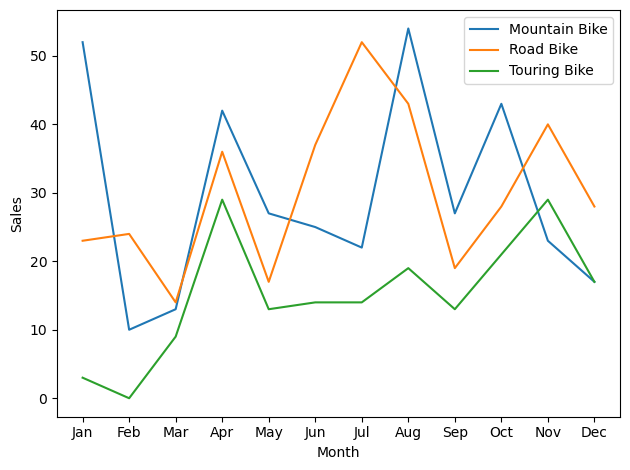

In [664]:
y = salesdf.groupby(['Month', 'Category'])['Quantity'].sum().unstack()
y = y.fillna(0)
plt.plot(months,y['Mountain Bike'],label='Mountain Bike')
plt.plot(months,y['Road Bike'],label='Road Bike')
plt.plot(months,y['Touring Bike'],label='Touring Bike')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.savefig('Bike Sales by Month')

### Customer Analysis

In [668]:
custdf = pd.read_excel('Bicycle Shop Data.xlsx',sheet_name='Customers By Purchases')
custdf.head()

,Customer Name,Purchases,Separate Sales,Amount Spent,Most Recent Purchase
0,Alison Yuan,15,2,35963.89,2022-10-15
1,Janet Young,13,2,34014.87,2022-02-14
2,Jordan Young,13,2,29835.92,2022-03-10
3,Latoya Yuan,14,2,26405.76,2022-12-02
4,Vincent Ye,10,2,25724.89,2022-11-26


In [669]:
#RFM Analysis brings together Recency, Frequency and Monetary values to evaluate customer loyalty, 5=best 1=worst
#first we'll evaluate recency, and assume the date now is 1st Jan 2023
today = pd.to_datetime('01-01-2023')
custdf['Most Recent Purchase'] = pd.to_datetime(custdf['Most Recent Purchase'])
recency = today - custdf['Most Recent Purchase'] #finding days since last purchase
#creating 5 groups of equal size based on recency with a grading 1-5
custdf['Recency Score']=pd.qcut(recency, 4, labels=[5,4,3,2]) #equally distributing ratings 5-2
custdf['Recency Score'] = custdf['Recency Score'].cat.add_categories([1]) 
custdf['Recency Score'].fillna(1, inplace=True) #customers with no purchases in the last year are assigned a 1 rating 
custdf['Recency Score'].value_counts()

C:\Users\JColc\AppData\Local\Temp\ipykernel_8704\774586189.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  custdf['Recency Score'].fillna(1, inplace=True) #customers with no purchases in the last year are assigned a 1 rating


Recency Score
1    157
4     51
5     50
2     50
3     48
Name: count, dtype: int64

In [670]:
#doing the same process for frequency, where frequency is separate sales (different date) not each purchase
custdf['Separate Sales'].value_counts() # finding the distribution of separate sales

Separate Sales
0    157
1    125
2     52
3     17
4      5
Name: count, dtype: int64

In [671]:
mapping = {0: 1,1: 2,2: 3,3: 4,4: 5}
custdf['Frequency Score']=custdf['Separate Sales'].map(mapping)
custdf.head()

,Customer Name,Purchases,Separate Sales,Amount Spent,Most Recent Purchase,Recency Score,Frequency Score
0,Alison Yuan,15,2,35963.89,2022-10-15,4,3
1,Janet Young,13,2,34014.87,2022-02-14,2,3
2,Jordan Young,13,2,29835.92,2022-03-10,2,3
3,Latoya Yuan,14,2,26405.76,2022-12-02,5,3
4,Vincent Ye,10,2,25724.89,2022-11-26,5,3


In [672]:
spend = custdf['Amount Spent'] 
zeroes = custdf['Amount Spent'] == 0 #finding the customers who spent nothing
custdf['Monetary Score'] = None #creating a monetary score column
custdf.loc[~zeroes, 'Monetary Score'] #using loc, I can index the rows of people who spent and didn't spend using ~ or no ~

0      None
1      None
2      None
3      None
4      None
       ... 
192    None
193    None
194    None
195    None
196    None
Name: Monetary Score, Length: 197, dtype: object

In [673]:
custdf.loc[zeroes, 'Monetary Score'] = 1 #assigning a score of 1 to all 0 spenders
custdf.loc[~zeroes, 'Monetary Score'] = pd.qcut(custdf.loc[~zeroes, 'Amount Spent'],4,labels=[2, 3, 4, 5])
custdf.head()

,Customer Name,Purchases,Separate Sales,Amount Spent,Most Recent Purchase,Recency Score,Frequency Score,Monetary Score
0,Alison Yuan,15,2,35963.89,2022-10-15,4,3,5
1,Janet Young,13,2,34014.87,2022-02-14,2,3,5
2,Jordan Young,13,2,29835.92,2022-03-10,2,3,5
3,Latoya Yuan,14,2,26405.76,2022-12-02,5,3,5
4,Vincent Ye,10,2,25724.89,2022-11-26,5,3,5


In [674]:
custdf['Recency Score'].astype(int)

0      4
1      2
2      2
3      5
4      5
      ..
351    1
352    1
353    1
354    1
355    1
Name: Recency Score, Length: 356, dtype: int64

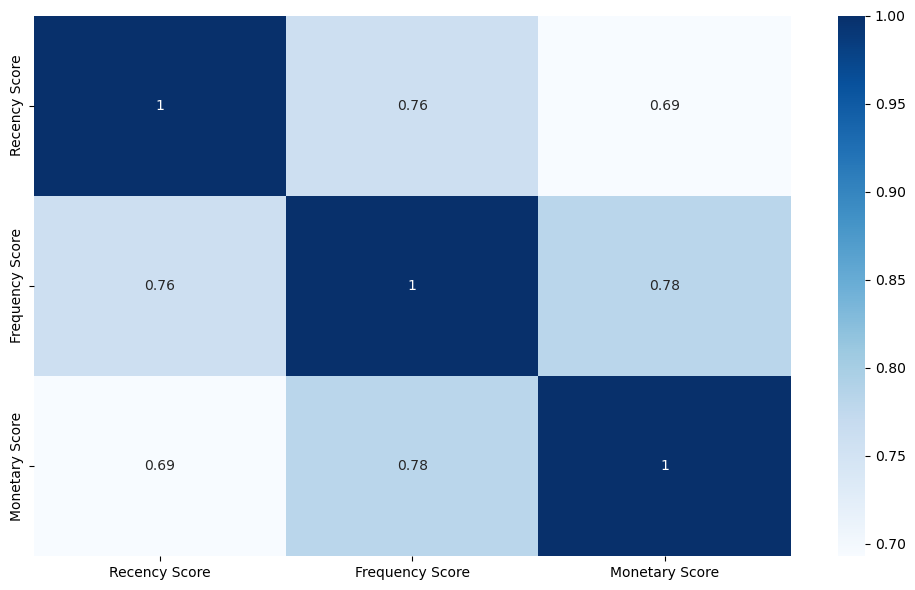

In [675]:
#creating a figure that shows the correlations between each score e.g. do recent purchases correlate with frequent purchases
plt.figure(figsize=(10,6))
sns.heatmap(custdf[['Recency Score','Frequency Score','Monetary Score']].astype(int).corr(), annot = True,
            cmap='Blues')
plt.tight_layout()
plt.savefig('Customer RFM Heatmap')

In [686]:
#categorising into groups based on rfm score
custdf['Segment'] = None
for i in range(len(custdf)):
    r,f,m = custdf.loc[i,'Recency Score'],custdf.loc[i,'Frequency Score'],custdf.loc[i,'Monetary Score']
    if r == 5 and f >= 4 and m >= 4:
        custdf.loc[i,'Segment'] = 'Champions'
    elif f >= 4 and m >= 3: #frequent and spend well
        custdf.loc[i,'Segment'] = 'Loyal Customers'
    elif m == 5 and f >= 3: 
        custdf.loc[i,'Segment'] = 'Big Spenders'
    elif r == 5 and f <= 2:
        custdf.loc[i,'Segment'] = 'Recent Customers'
    elif r >= 4 and f >= 2: #fairly recent and have moderate frequency
        custdf.loc[i,'Segment'] = 'Potential Loyalist'
    elif r <= 2 and f >= 3: #was frequent but hasn't spent in a while
        custdf.loc[i,'Segment'] = 'At Risk'
    elif r <= 2 and f <= 2 and m <=2:
        custdf.loc[i,'Segment'] = 'Hibernating'
    elif r >= 3 and f >= 2 and m >= 2:
        custdf.loc[i,'Segment'] = "Regular Customers"
    else:
        custdf.loc[i,'Segment'] = 'Other'
custdf['Segment'].value_counts()

Segment
Hibernating           170
Potential Loyalist     50
Regular Customers      44
Other                  25
Recent Customers       21
Big Spenders           19
Loyal Customers        12
Champions               9
At Risk                 6
Name: count, dtype: int64

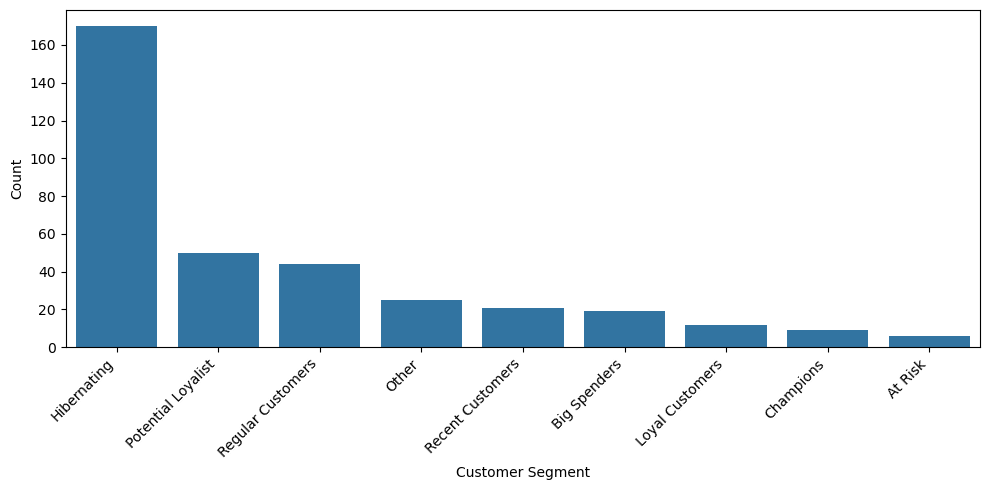

In [680]:
plt.figure(figsize=(10,5))
sns.countplot(data=custdf, x='Segment', order=custdf['Segment'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Distribution of Customer Segments')

C:\Users\JColc\AppData\Local\Temp\ipykernel_8704\281808389.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat = custdf.pivot_table(
C:\Users\JColc\AppData\Local\Temp\ipykernel_8704\281808389.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)


Text(70.72222222222221, 0.5, 'Recency Score')

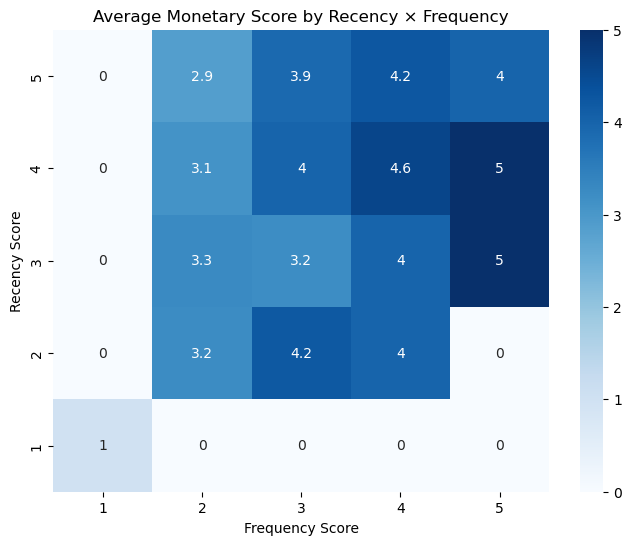

In [557]:
heat = custdf.pivot_table(
    index='Recency Score',
    columns='Frequency Score',
    values='Monetary Score',
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='Blues')
plt.title('Average Monetary Score by Recency × Frequency')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')

<Axes: ylabel='Frequency'>

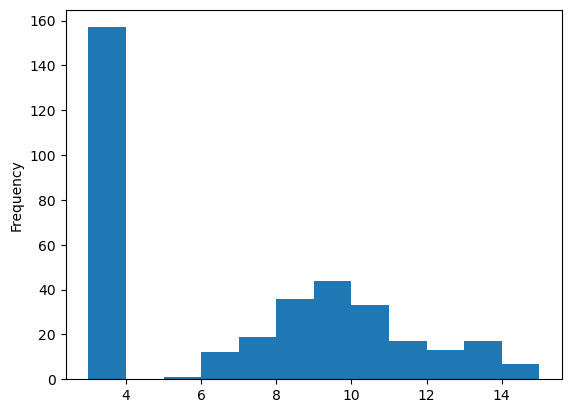

In [682]:
custdf['RFM_Total'] = (custdf['Recency Score'].astype(int) +custdf['Frequency Score'].astype(int) +custdf['Monetary Score'].astype(int))
custdf['RFM_Total'].plot(kind='hist', bins=12)

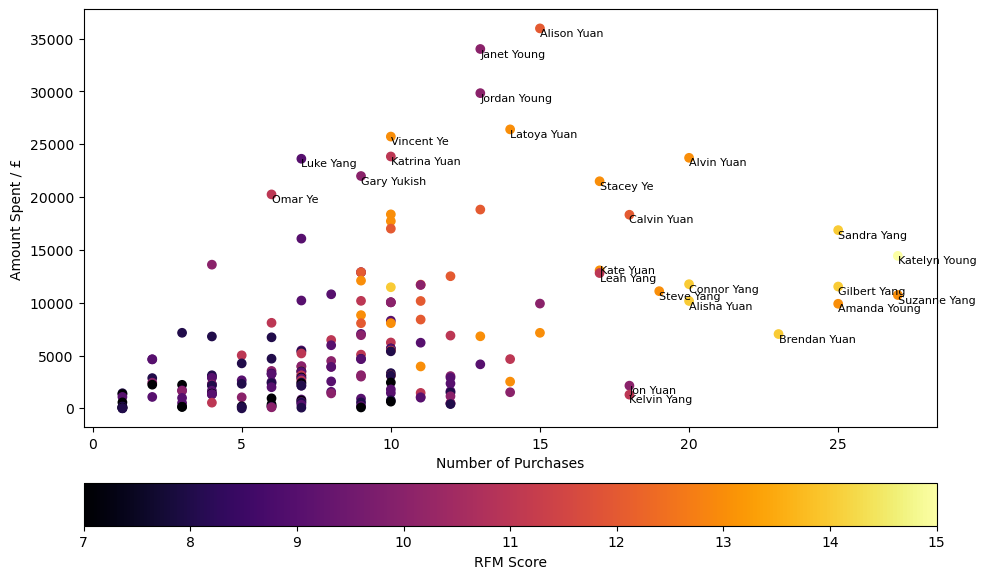

In [683]:
active_df = custdf[custdf['Segment'] != 'Hibernating']
labels = active_df['Customer Name']
x=active_df['Purchases']
y=active_df['Amount Spent']

plt.figure(figsize=(10,6))
scatter = plt.scatter(x,y,c=active_df['RFM_Total'],cmap='inferno')
plt.colorbar(scatter, label='RFM Score',orientation='horizontal',pad=0.1)

for xi, yi, label in zip(x, y, labels):
    if xi>15 or yi>20000:
        if label == 'Kate Yuan':
            plt.text(xi, yi+500, label, fontsize=8, ha='left', va='top')
        else:
            plt.text(xi, yi, label, fontsize=8, ha='left', va='top')
plt.xlabel('Number of Purchases')
plt.ylabel('Amount Spent / £')
plt.tight_layout()

plt.savefig('Purchases vs Amount Spent (Colour graded by RFM Score)')